## Probability

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd
from io import StringIO

data = StringIO("""a,b,c,d,e,f
    1,1,0,0,0,1
    1,1,0,1,0,0
    0,1,1,1,0,0
    0,0,1,1,0,1
    0,0,1,0,1,1
""")

bag_of_words = pd.read_csv(data, sep=",")
bag_of_words

bag_of_words == 1

,a,b,c,d,e,f
0,True,True,False,False,False,True
1,True,True,False,True,False,False
2,False,True,True,True,False,False
3,False,False,True,True,False,True
4,False,False,True,False,True,True


In [2]:
import collections

class Parser(object):
    def __init__(self, elements):
        self.elements = elements
    
    def as_list(self):
        if self.is_iterable(self.elements):
            return self.elements
        
        return list(self.elements)

    def is_iterable(self, obj):
        return isinstance(obj, collections.Sequence) and not isinstance(obj, str)


class ExperimentBagOfWords():
    
    def __init__(self, bag_of_words):
        self.bag_of_words = bag_of_words

    def P(self, variable):
        """
        P(variables)
        """
        total = len(self.bag_of_words)
        
        return self.bag_of_words[variable].value_counts() / total
    
    def conditionalP(self, variables):
        """
        P(others | variables)
        """
        total = len(self.bag_of_words)
        
        groupby = experiment.bag_of_words.groupby(variables).sum()
        
        return groupby / groupby.sum()
        
experiment = ExperimentBagOfWords(bag_of_words.copy())

# Probability and Joint probability
experiment.P('a')
#Não funciona: experiment.P(['a', 'b'])

# conditional
experiment.conditionalP('b')
experiment.conditionalP(['b', 'd'])

a         c    e         f
b d                              
0 0  0.0  0.333333  1.0  0.333333
  1  0.0  0.333333  0.0  0.333333
1 0  0.5  0.000000  0.0  0.333333
  1  0.5  0.333333  0.0  0.000000

In [3]:
prob = experiment.conditionalP(['b', 'd'])

#P(a | b=1, d=1)
prob['a'][1][1]
#P(variables | b=1, d=1)
prob.T[1][1]

a    0.500000
c    0.333333
e    0.000000
f    0.000000
Name: 1, dtype: float64

## Pedalboards

In [81]:
path = '/home/paulo/git/reconhecimento-padroes/projeto-final/data/pedalboard-plugin-bag-of-words.csv'
pedalboards_base = pd.read_csv(path, index_col=['index', 'id'])

# Remove guitar_patches.id column
pedalboards_base = pedalboards_base.reset_index(level='id', drop=True)
# Remove never unused plugin
# > pedalboards_filtered.T[pedalboards_filtered.sum() == 0]
# 9
del pedalboards_base['9']

print('Original dataset:', len(pedalboards_base), 'presets')
pedalboards_base.head()

Original dataset: 3121 presets


,0,1,2,3,4,5,6,7,8,10,...,107,108,109,110,111,112,113,114,115,116
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Remove None column
# A preset contains 6 "space" effects. A 'None' effect is an "effect space not used"
del pedalboards_base['107']

Total of presets with n plugins used


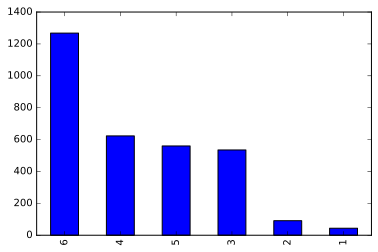

In [83]:
print('Total of presets with n plugins used')
pedalboards_base.T.sum().value_counts().plot.bar();

Consider only one plugin if a preset contains more then one of the same plugin


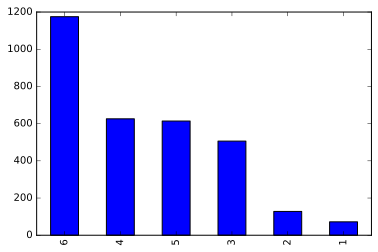

In [84]:
print('Consider only one plugin if a preset contains more then one of the same plugin')
pedalboards = ((pedalboards_base > 0)*1)

pedalboards.T.sum().value_counts().plot.bar();

In [85]:
pedalboards_filtered = pedalboards[pedalboards.T.sum() > 3]

print('All presets with more then three plugins:', len(pedalboards_filtered), 'presets')

pedalboards_filtered.head()

All presets with more then three plugins: 2415 presets


,0,1,2,3,4,5,6,7,8,10,...,106,108,109,110,111,112,113,114,115,116
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
experiment = ExperimentBagOfWords(pedalboards_filtered)

print('P(plugins | 2 and 24)')
experiment.conditionalP(['2', '24'])#.T[1][1].sort_values(ascending=False).

P(plugins | 2 and 24)


0       1    3    4         5        6         7         8   10  \
2 24                                                                           
0 0   0.958333  0.9375  1.0  1.0  0.921875  0.83871  0.767677  0.666667  1.0   
  1   0.041667  0.0000  0.0  0.0  0.078125  0.16129  0.207071  0.333333  0.0   
1 0   0.000000  0.0625  0.0  0.0  0.000000  0.00000  0.025253  0.000000  0.0   
  1   0.000000  0.0000  0.0  0.0  0.000000  0.00000  0.000000  0.000000  0.0   

       11    ...          106       108       109       110       111  \
2 24         ...                                                        
0 0   1.0    ...     0.830189  0.923077  0.804348  0.932432  0.789474   
  1   0.0    ...     0.169811  0.038462  0.195652  0.067568  0.210526   
1 0   0.0    ...     0.000000  0.038462  0.000000  0.000000  0.000000   
  1   0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   

           112       113    114       115       116  
2 24                                                 
0 0   0.968254  0.833333  0.975  0.903846  0.833333  
  1   0.031746  0.166667  0.000  0.096154  0.166667  
1 0   0.000000  0.000000  0.000  0.000000  0.000000  
  1   0.000000  0.000000  0.025  0.000000  0.000000  

[4 rows x 113 columns]

In [104]:
print('(ordered) P(plugins | 2==1 and 24==1)')
experiment.conditionalP(['2', '24']).T[1][1].sort_values(ascending=False).head(10)

(ordered) P(plugins | 2==1 and 24==1)


16     0.025641
114    0.025000
21     0.023810
103    0.020408
49     0.020000
38     0.011111
64     0.008403
105    0.005000
63     0.004878
37     0.000000
Name: 1, dtype: float64

In [68]:
plugin_used_filter = pedalboards_filtered.iloc[0] == 1
pedalboards_filtered.iloc[0][plugin_used_filter].index
#pedalboards_filtered.reset_index(level='id', drop=True)
#pedalboards_filtered.index[plugin_used_filter]#.tolist()

Index(['23', '27', '61', '73', '106', '109'], dtype='object')

In [69]:
plugin_used_filter = pedalboards_filtered == 1
plugin_used_filter
#pedalboards_filtered.iloc[0][plugin_used_filter].index

,0,1,2,3,4,5,6,7,8,9,...,106,108,109,110,111,112,113,114,115,116
index,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
